In [ ]:
import sys
import matplotlib.font_manager as fm

if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' | \
  debconf-set-selections

  !sudo apt-get -qq -y install fonts-nanum
  fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanu

In [ ]:
import seaborn as sns

pic_path = 'C:\\Users\\reot1\\OneDrive\\바탕 화면\\오늘의집'

In [ ]:
plt.rc('font', family='NanumBarunGothic', size=10)
plt.rcParams['figure.dpi'] = 100

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/mydata.db')

# 상품 데이터 분석

In [ ]:
from pandas import read_sql_query as sql_q
from pandas import read_sql_table as sql_t

In [ ]:
sql_q(
  "SELECT * FROM DATASET2",
  conn
).head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# DIVISION NAME별 평점
# sqlite는 필드명에 공백이 들어갈 시 []로 구분

div_rate = sql_q(
    "SELECT [Division Name],\
    AVG(RATING) AVG_RATE\
    FROM DATASET2\
    GROUP BY 1\
    ORDER BY 2 DESC;",
    conn
    )

div_rate


,Division Name,AVG_RATE
0,,5.000000
1,Initmates,4.294985
2,General Petite,4.208867
3,General,4.172644


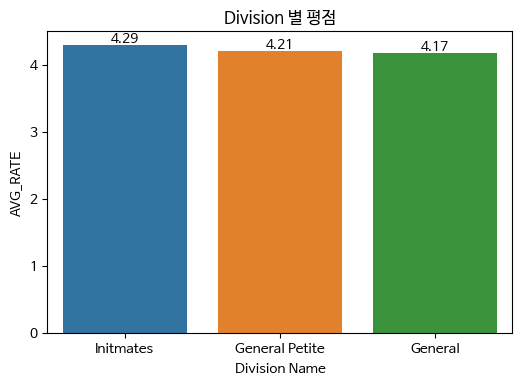

In [ ]:
sns.barplot(data = div_rate[div_rate['Division Name']!=''], x='Division Name', y='AVG_RATE')
plt.title('Division 별 평점')

for idx, val in div_rate[div_rate['Division Name']!='']['AVG_RATE'].items():
  idx = idx-1
  val = np.round(val,2)
  plt.annotate(val, (idx,val), xytext=(0,2), textcoords='offset points',
               ha='center', fontsize=10, color='black')
plt.savefig('div_rate.png')
plt.show()

In [ ]:
# DEPARTMENT별 평점

dep_rate = sql_q(
    "SELECT [Department Name],\
    AVG(RATING) AVG_RATE\
    FROM DATASET2\
    GROUP BY 1\
    ORDER BY 2 DESC;",
    conn
    )

dep_rate

,Department Name,AVG_RATE
0,,5.000000
1,Bottoms,4.283282
2,Intimate,4.283055
3,Jackets,4.278742
4,Tops,4.169089
5,Dresses,4.146834
6,Trend,3.850000


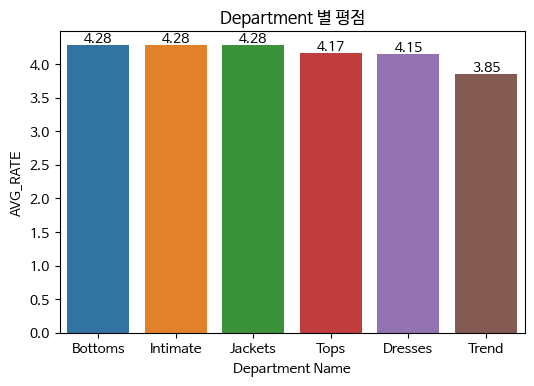

In [ ]:
sns.barplot(data = dep_rate[dep_rate['Department Name']!=''], x='Department Name', y='AVG_RATE')
plt.title('Department 별 평점')

for idx, val in dep_rate[dep_rate['Department Name']!='']['AVG_RATE'].items():
  idx = idx-1
  val = np.round(val,2)
  plt.annotate(val, (idx,val), xytext=(0,2), textcoords='offset points',
               ha='center', fontsize=10, color='black')
plt.savefig('dep_rate.png')
plt.show()

## Trend 분야에서 평점이 다른 분야보다 낮은 것을 확인

In [ ]:
# sqlite 정수형 나눗셈 연산시 정수값으로 반환
# Trend 평점 3점 이하의 연령별 분포
t_ageband_3 = sql_q(
    "SELECT (AGE/10)*10 AGEBAND, COUNT(*) CNT\
    FROM DATASET2\
    WHERE [DEPARTMENT NAME] = 'Trend'\
    AND RATING <= 3\
    GROUP BY 1\
    ORDER BY 2 DESC;",
    conn
)
t_ageband_3

,AGEBAND,CNT
0,50,10
1,40,9
2,30,6
3,60,4
4,20,4
5,70,1


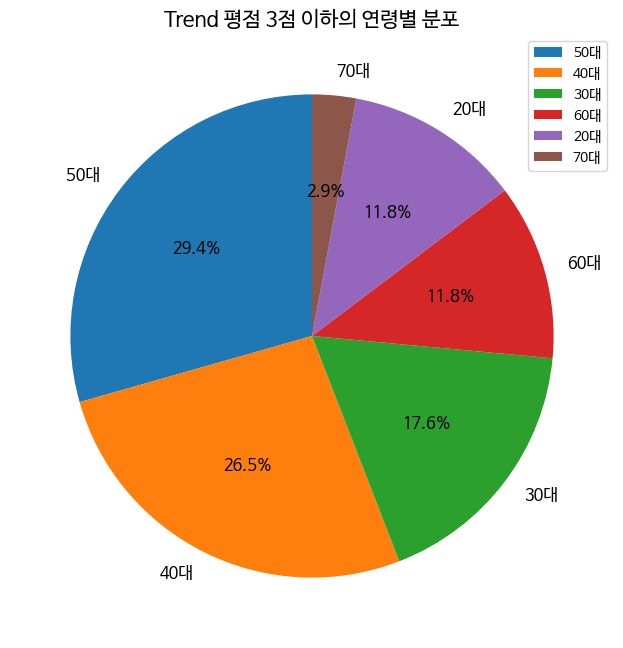

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(t_ageband_3['CNT'], labels=t_ageband_3['AGEBAND'].apply(lambda x : f'{x}대'),
        startangle=90, autopct='%.1f%%', textprops={'size':12})
ax.legend(t_ageband_3['AGEBAND'].apply(lambda x : f'{x}대'),loc='best')
ax.set_title('Trend 평점 3점 이하의 연령별 분포', size=15)

fig.savefig('pie_trend_3.png')
fig.show()

In [ ]:
# Trend 분야 전체의 연령별 분포
t_all_rate = sql_q(
    "SELECT (AGE/10)*10 AGEBAND, COUNT(*) CNT\
    FROM DATASET2\
    WHERE [DEPARTMENT NAME] = 'Trend'\
    GROUP BY 1\
    ORDER BY 2 DESC;",
    conn
)
t_all_rate

,AGEBAND,CNT
0,30,29
1,40,24
2,50,23
3,20,12
4,60,10
5,80,1
6,70,1


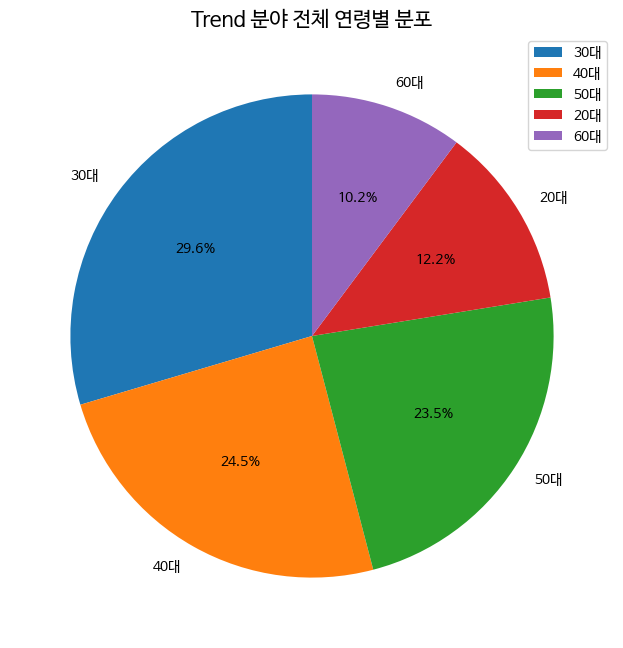

In [314]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(t_all_rate['CNT'][:-2], labels=t_all_rate['AGEBAND'][:-2].apply(lambda x : f'{x}대'),
        startangle=90, autopct='%.1f%%', textprops={'size':10})
ax.legend(t_all_rate['AGEBAND'].apply(lambda x : f'{x}대'),loc='best')
ax.set_title('Trend 분야 전체 연령별 분포', size=15)
fig.savefig('pie_trend_all.png')
fig.show()

Trend 분야 전체에서 연령별 분포를 확인하였을 때 50대가 적지 않은 비중을 차지하고 있으며, Trend 분야의 3점 이하 연령별 분포를 확인하였을 때 50대가 가장 많은 비중을 차지하고 있는 것으로 보아 50대의 Trend 분야의 3점 이하 리뷰를 확인

In [ ]:
trend50_3 = sql_q(
    "SELECT *\
    FROM DATASET2\
    WHERE [DEPARTMENT NAME] = 'Trend'\
    AND RATING <= 3\
    AND AGE BETWEEN 50 AND 59;",
    conn
    )
trend50_3[['Clothing ID','Age','Title','Review Text','Rating']].head()

,Clothing ID,Age,Title,Review Text,Rating
0,1135,53,,,1
1,1145,51,Beyond boxy,I am not sure who would look good in this dres...,1
2,570,56,Fun fabric,"The print is unique and fun. however, the long...",3
3,552,53,You don't know what you get until you get them...,Like a previous reviewer mentioned the jeans d...,3
4,569,55,"Gorgeous lace top, design fail",I recommend this topper but with reservations....,3


In [315]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vect = CountVectorizer(max_features=1000, stop_words = 'english')

review_matrix = vect.fit_transform(trend50_3[trend50_3['Review Text']!='']['Review Text'])

trans = TfidfTransformer()

tdm = trans.fit_transform(review_matrix)

wc = pd.DataFrame({
    '단어': vect.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

tf_idf = wc.sort_values('tf-idf', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [316]:
tf_idf[:10].T

,0,1,2,3,4,5,6,7,8,9
단어,dress,like,size,ordered,fabric,pretty,sides,look,wide,unique
tf-idf,1.003195,0.806008,0.670479,0.580705,0.564145,0.546324,0.525694,0.48158,0.439499,0.409571


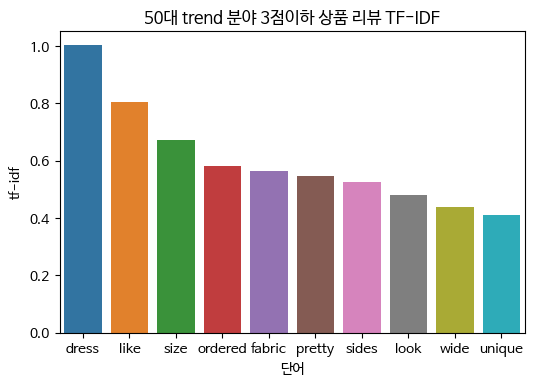

In [317]:
sns.barplot(data=tf_idf[:10], x = '단어', y='tf-idf')
plt.title('50대 trend 분야 3점이하 상품 리뷰 TF-IDF')
plt.savefig('50_trend_TF_IDF.png')
plt.show()

50대의 trend 분야 TF-IDF 확인 결과 size에 대한 단어의 등장 빈도가 많음을 확인,
전체 분야의 평점이 낮은 상품들로 리뷰를 확인하고 어떤 단어가 가장 많이 등장하는지 확인

# 평점이 낮은 상품의 주요 Complain 확인

In [ ]:
# Department Name, Clothing ID별 평균 평점

sql_q(
    "SELECT [DEPARTMENT NAME], [CLOTHING ID], AVG(RATING) AVG_RATE\
    FROM DATASET2\
    GROUP BY 1,2;",
    conn
).head(10)

,Department Name,Clothing ID,AVG_RATE
0,,72,5.0
1,,136,5.0
2,,152,5.0
3,,184,5.0
4,,492,5.0
5,,772,5.0
6,Bottoms,9,4.0
7,Bottoms,18,1.0
8,Bottoms,36,5.0
9,Bottoms,52,5.0


In [ ]:
# Department별 순위 확인
sql_q(
    "SELECT *,\
    ROW_NUMBER() OVER(PARTITION BY [DEPARTMENT NAME] ORDER BY AVG_RATE) RNK\
    FROM(\
      SELECT [DEPARTMENT NAME], [CLOTHING ID], AVG(RATING) AVG_RATE\
      FROM DATASET2\
      GROUP BY 1,2\
      ) BASE;",
      conn
).head(10)

,DEPARTMENT NAME,CLOTHING ID,AVG_RATE,RNK
0,,72,5.0,1
1,,136,5.0,2
2,,152,5.0,3
3,,184,5.0,4
4,,492,5.0,5
5,,772,5.0,6
6,Bottoms,18,1.0,1
7,Bottoms,588,2.0,2
8,Bottoms,1039,2.4,3
9,Bottoms,450,2.5,4


In [ ]:
# Department별 Top10
dep_bad_10=sql_q(
    "SELECT *\
    FROM(\
      SELECT *,\
      ROW_NUMBER() OVER(PARTITION BY [DEPARTMENT NAME] ORDER BY AVG_RATE) RNK\
      FROM(\
        SELECT [DEPARTMENT NAME], [CLOTHING ID], AVG(RATING) AVG_RATE\
        FROM DATASET2\
        GROUP BY 1,2\
        ) BASE\
      ) BASE2\
    WHERE RNK <= 10;",
      conn
)
dep_bad_10.head(10)

,DEPARTMENT NAME,CLOTHING ID,AVG_RATE,RNK
0,,72,5.0,1
1,,136,5.0,2
2,,152,5.0,3
3,,184,5.0,4
4,,492,5.0,5
5,,772,5.0,6
6,Bottoms,18,1.0,1
7,Bottoms,588,2.0,2
8,Bottoms,1039,2.4,3
9,Bottoms,450,2.5,4


In [322]:
dep_bad_10[dep_bad_10['DEPARTMENT NAME']!=''].pivot_table(index='DEPARTMENT NAME', values='AVG_RATE', aggfunc=['mean','count'])

,mean,count
,AVG_RATE,AVG_RATE
DEPARTMENT NAME,,
Bottoms,2.425000,10
Dresses,3.214865,10
Intimate,1.000000,10
Jackets,2.887407,10
Tops,2.787500,10
Trend,2.681190,10


In [ ]:
c = conn.cursor()

In [ ]:
# 참조 VIEW 생성
c.execute(
    "CREATE VIEW IF NOT EXISTS STAT AS\
    SELECT *\
    FROM(\
      SELECT *,\
      ROW_NUMBER() OVER(PARTITION BY [DEPARTMENT NAME] ORDER BY AVG_RATE) RNK\
      FROM(\
        SELECT [DEPARTMENT NAME], [CLOTHING ID], AVG(RATING) AVG_RATE\
        FROM DATASET2\
        GROUP BY 1,2\
        ) BASE\
      ) BASE2\
    WHERE RNK <= 10;"
)

In [ ]:
# 평점 3점 이하 상품만 추출

bad_top10 = sql_q(
    "SELECT * FROM DATASET2\
    WHERE RATING <= 3 AND \
    [CLOTHING ID] IN (\
    SELECT [CLOTHING ID] FROM STAT);",
    conn
    )

bad_top10 = bad_top10[['Clothing ID', 'Title', 'Review Text', 'Rating', 'Department Name']].sort_values(by='Department Name')
bad_top10[bad_top10['Department Name']!='']

,Clothing ID,Title,Review Text,Rating,Department Name
88,588,Nope.,The picture makes the shorts look structured. ...,1,Bottoms
169,1039,I like them but...,First off: kudos to the other reviewers for se...,3,Bottoms
170,1039,Not the right color,I ordered these twice just to be sure there wa...,1,Bottoms
25,1006,Wanted to love this skirt,I was so curious to see this skirt. it looks j...,2,Bottoms
161,453,Quality changed,Pilcro stet roll ups are my fave! i have about...,2,Bottoms
...,...,...,...,...,...
164,559,"Great fabric, but runs small","Love the look of this and the fabric, but runs...",2,Trend
21,1145,Beyond boxy,I am not sure who would look good in this dres...,1,Trend
29,1145,Huge,I like my dresses oversized but this one is ri...,2,Trend
41,552,Not as pictured,The jeans look so different online! the pair i...,1,Trend


In [ ]:
# 각 Department 별 평점이 낮은 10개의 상품 리뷰에 대한 TF_IDF 확인
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vect = CountVectorizer(max_features=1000, stop_words = 'english')

review_matrix = vect.fit_transform(bad_top10['Review Text'])

trans = TfidfTransformer()

tdm = trans.fit_transform(review_matrix)

wc = pd.DataFrame({
    '단어': vect.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})

tf_idf = wc.sort_values('tf-idf', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_idf.head(10).T

,0,1,2,3,4,5,6,7,8,9
단어,dress,like,fabric,just,fit,small,material,look,love,size
tf-idf,16.078813,9.083907,7.484534,7.116761,6.973084,6.102549,5.970694,5.946685,5.545414,5.347959


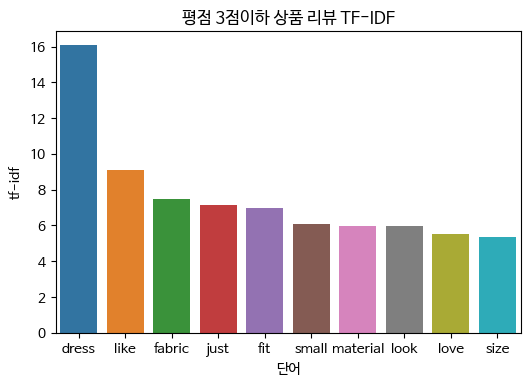

In [310]:
sns.barplot(data=tf_idf[:10], x = '단어', y='tf-idf')
plt.title('평점 3점이하 상품 리뷰 TF-IDF')
plt.savefig('All_TF_IDF.png')
plt.show()

각 Department 별 평점이 낮은 10개의 상품들의 전체 리뷰를 TF-IDF로 점수를 내어 확인한 결과 중에 의미 있는 단어들 가운데 size에 대한 점수가 높게 나옴

# size에 대한 리뷰 분석

In [ ]:
# size에 대한 내용이면 1, 아니면 0으로 표시

sql_q(
    "SELECT [REVIEW TEXT],\
    CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END SIZE_YN\
    FROM DATASET2;",
    conn
    ).head(10)

,Review Text,SIZE_YN
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
5,"I love tracy reese dresses, but this one is no...",0
6,I aded this in my basket at hte last mintue to...,1
7,"I ordered this in carbon for store pick up, an...",1
8,I love this dress. i usually get an xs but it ...,1
9,Dress runs small esp where the zipper area run...,0


In [ ]:
# size에 대한 리뷰 수와 전체 리뷰 수
size_review_df = sql_q(
    "SELECT SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE_O,\
    SUM(CASE WHEN [REVIEW TEXT] NOT LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE_X,\
    COUNT(*) N_TOTAL\
    FROM DATASET2;",
    conn
    )

size_review_df

,N_SIZE_O,N_SIZE_X,N_TOTAL
0,6133,14470,20603


In [ ]:
size_review_df.iloc[0]

N_SIZE_O     6133
N_SIZE_X    14470
N_TOTAL     20603
Name: 0, dtype: int64

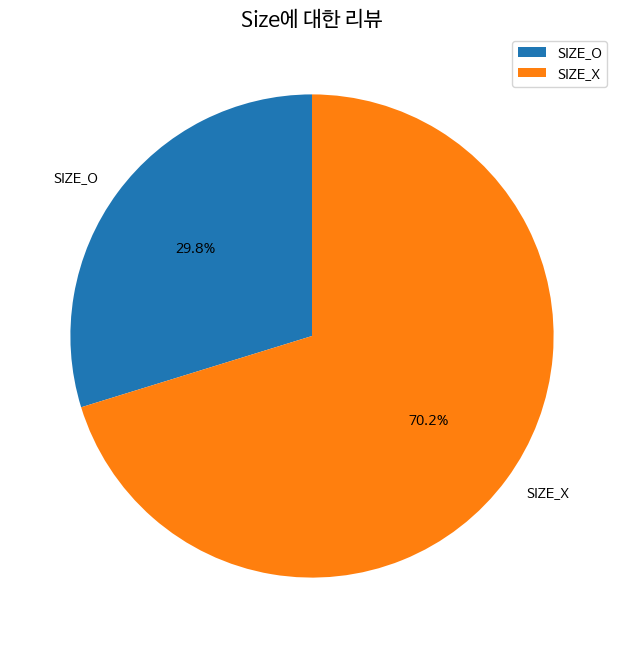

In [313]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(size_review_df.iloc[0][:2], labels=['SIZE_O', 'SIZE_X'],
        startangle=90, autopct='%.1f%%', textprops={'size':10})
ax.legend(['SIZE_O', 'SIZE_X'],loc='best')
ax.set_title('Size에 대한 리뷰', size=15)
fig.savefig('size.png')
fig.show()

In [ ]:
# size와 관련된 large, loose, tight, small등에 대한 단어가 포함된 리뷰 수 확인
size_review_df2 = sql_q(
    "SELECT\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_SIZE_T_O,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 0 ELSE 1 END) N_SIZE_T_X,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,\
    SUM(1) N_TOTAL\
    FROM DATASET2;",
    conn
    )
size_review_df2

,N_SIZE_T_O,N_SIZE_T_X,N_SIZE,N_LARGE,N_LOOSE,N_SMALL,N_TIGHT,N_TOTAL
0,9268,11335,6133,2508,1105,3432,1445,20603


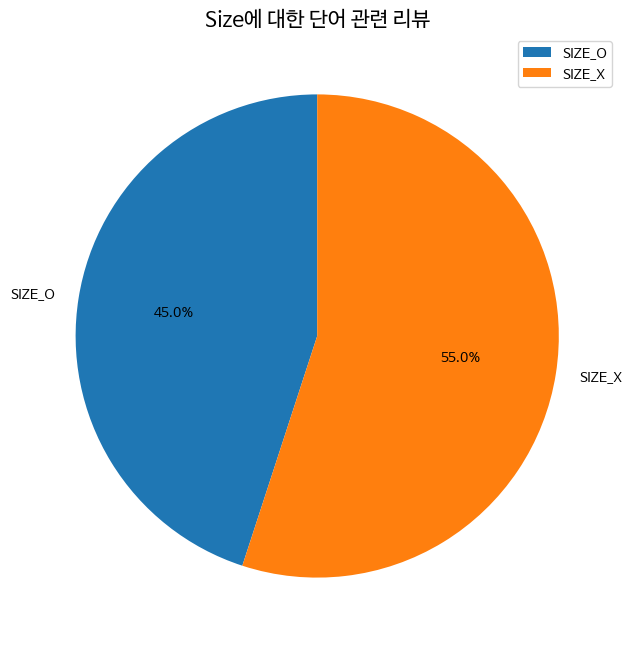

In [312]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(size_review_df2.iloc[0][:2], labels=['SIZE_O', 'SIZE_X'],
        startangle=90, autopct='%.1f%%', textprops={'size':10})
ax.legend(['SIZE_O', 'SIZE_X'],loc='best')
ax.set_title('Size에 대한 단어 관련 리뷰', size=15)
fig.savefig('size2.png')
fig.show()

In [ ]:
# Department Name 별 size와 관련된 단어가 포함된 리뷰 수 확인
dep_size_review_df = sql_q(
    "SELECT [DEPARTMENT NAME],\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_SIZE_T,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,\
    SUM(1) N_TOTAL\
    FROM DATASET2\
    GROUP BY 1;",
    conn
    )

dep_size_review_df

,Department Name,N_SIZE_T,N_SIZE,N_LARGE,N_LOOSE,N_SMALL,N_TIGHT,N_TOTAL
0,,6,3,1,0,1,2,13
1,Bottoms,1545,1145,296,143,484,265,3230
2,Dresses,2577,1669,697,294,900,503,5353
3,Intimate,667,412,171,58,296,120,1558
4,Jackets,447,288,126,35,199,52,922
5,Tops,3967,2576,1200,570,1527,494,9427
6,Trend,59,40,17,5,25,9,100


In [ ]:
# 각 Department Name와 각 연령별 size와 관련된 단어가 포함된 리뷰 수 확인
dep_age_size_review_df = sql_q(
    "SELECT (AGE/10)*10 AGEBAND, [DEPARTMENT NAME],\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_SIZE_T,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,\
    SUM(1) TOTAL_REVIEW\
    FROM DATASET2\
    GROUP BY 1,2\
    ORDER BY 1,2;",
    conn
    )

dep_age_size_review_df.head(10)

,AGEBAND,Department Name,N_SIZE_T,N_SIZE,N_LARGE,N_LOOSE,N_SMALL,N_TIGHT,TOTAL_REVIEW
0,10,Bottoms,5,3,2,1,1,1,8
1,10,Dresses,6,2,0,0,4,2,13
2,10,Intimate,3,2,0,0,1,1,6
3,10,Jackets,0,0,0,0,0,0,1
4,10,Tops,6,5,1,1,3,1,12
5,20,,2,1,0,0,1,1,2
6,20,Bottoms,178,126,38,17,58,33,365
7,20,Dresses,357,232,101,40,136,66,748
8,20,Intimate,98,60,26,12,45,23,251
9,20,Jackets,57,33,14,3,27,7,113


In [ ]:
dep_age_size_review_df['AGEBAND'].value_counts()

20    7
30    7
40    7
50    7
60    6
70    6
80    6
10    5
90    4
Name: AGEBAND, dtype: int64

In [ ]:
# 각 Department Name와 각 연령별 size와 관련된 단어가 포함된 리뷰 비율
dep_age_size_review_ratio_df = sql_q(
    "SELECT (AGE/10)*10 AGEBAND, [DEPARTMENT NAME],\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0.0 END) / SUM(1) R_SIZE_T,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1.0 ELSE 0 END) / SUM(1) R_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1.0 ELSE 0 END) / SUM(1) R_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1.0 ELSE 0 END) / SUM(1) R_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1.0 ELSE 0 END) / SUM(1) R_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1.0 ELSE 0 END) / SUM(1) R_TIGHT\
    FROM DATASET2\
    GROUP BY 1,2\
    ORDER BY 1,2;",
    conn
    )

dep_age_size_review_ratio_df.head(10)

,AGEBAND,Department Name,R_SIZE_T,R_SIZE,R_LARGE,R_LOOSE,R_SMALL,R_TIGHT
0,10,Bottoms,0.625000,0.375000,0.250000,0.125000,0.125000,0.125000
1,10,Dresses,0.461538,0.153846,0.000000,0.000000,0.307692,0.153846
2,10,Intimate,0.500000,0.333333,0.000000,0.000000,0.166667,0.166667
3,10,Jackets,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10,Tops,0.500000,0.416667,0.083333,0.083333,0.250000,0.083333
5,20,,1.000000,0.500000,0.000000,0.000000,0.500000,0.500000
6,20,Bottoms,0.487671,0.345205,0.104110,0.046575,0.158904,0.090411
7,20,Dresses,0.477273,0.310160,0.135027,0.053476,0.181818,0.088235
8,20,Intimate,0.390438,0.239044,0.103586,0.047809,0.179283,0.091633
9,20,Jackets,0.504425,0.292035,0.123894,0.026549,0.238938,0.061947


In [ ]:
# Clothing ID별 size 리뷰 확인

cloth_size_df = sql_q(
    "SELECT [CLOTHING ID], [DEPARTMENT NAME],\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_SIZE_T,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,\
    SUM(1) TOTAL_REVIEW\
    FROM DATASET2\
    GROUP BY 1\
    ORDER BY 2, 3 DESC, 4 DESC, 5 DESC, 6 DESC, 7 DESC\
    ;",
    conn
)

cloth_size_df.head(10)

,Clothing ID,Department Name,N_SIZE_T,N_SIZE,N_LARGE,N_LOOSE,N_SMALL,N_TIGHT,TOTAL_REVIEW
0,184,,2,1,0,0,0,1,2
1,492,,1,1,0,0,1,0,3
2,772,,1,1,0,0,0,0,1
3,152,,1,0,1,0,0,0,3
4,72,,1,0,0,0,0,1,1
5,136,,0,0,0,0,0,0,3
6,1059,Bottoms,117,92,18,14,36,20,235
7,1033,Bottoms,91,72,10,11,16,25,184
8,1020,Bottoms,82,63,16,3,34,13,144
9,1056,Bottoms,81,67,13,10,12,17,183


In [ ]:
# Clothing ID별 size 리뷰 비율 확인

cloth_size_ratio_df = sql_q(
    "SELECT [CLOTHING ID], [DEPARTMENT NAME],\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' OR [REVIEW TEXT] LIKE '%SMALL%' OR [REVIEW TEXT] LIKE '%TIGHT%' OR [REVIEW TEXT] LIKE '%LARGE%' THEN 1 ELSE 0.0 END) / SUM(1) N_SIZEN_SIZE_T,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SIZE%' THEN 1.0 ELSE 0 END) / SUM(1) N_SIZE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LARGE%' THEN 1.0 ELSE 0 END) / SUM(1) N_LARGE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%LOOSE%' THEN 1.0 ELSE 0 END) / SUM(1) N_LOOSE,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%SMALL%' THEN 1.0 ELSE 0 END) / SUM(1) N_SMALL,\
    SUM(CASE WHEN [REVIEW TEXT] LIKE '%TIGHT%' THEN 1.0 ELSE 0 END) / SUM(1) N_TIGHT\
    FROM DATASET2\
    GROUP BY 1\
    ORDER BY 3 DESC, 4 DESC, 5 DESC, 6 DESC, 7 DESC\
    ;",
    conn
)

cloth_size_ratio_df.head(10)

,Clothing ID,Department Name,N_SIZEN_SIZE_T,N_SIZE,N_LARGE,N_LOOSE,N_SMALL,N_TIGHT
0,812,Intimate,1.0,1.0,1.0,1.0,1.0,0.0
1,271,Bottoms,1.0,1.0,1.0,1.0,0.0,1.0
2,797,Intimate,1.0,1.0,1.0,1.0,0.0,1.0
3,95,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
4,277,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
5,400,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
6,401,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
7,500,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
8,513,Intimate,1.0,1.0,1.0,0.0,1.0,0.0
9,556,Intimate,1.0,1.0,1.0,0.0,1.0,0.0


# 연령별 Worst Department

In [ ]:
# 연령, Department별 가장 낮은 점수 계산

age_worst_dep = sql_q(
    "SELECT * \
    FROM\
    (SELECT *,\
    ROW_NUMBER() OVER(PARTITION BY AGEBAND ORDER BY AVG_RATING) RNK\
    FROM\
    (SELECT [DEPARTMENT NAME], (AGE/10)*10 AGEBAND, AVG(RATING) AVG_RATING\
    FROM DATASET2\
    GROUP BY 1,2) BASE) BASE2\
    WHERE RNK = 1;",
    conn)
age_worst_dep.head(10)

,DEPARTMENT NAME,AGEBAND,AVG_RATING,RNK
0,Intimate,10,3.333333,1
1,Trend,20,3.833333,1
2,Dresses,30,4.120798,1
3,Trend,40,3.875000,1
4,Trend,50,3.304348,1
5,Trend,60,3.800000,1
6,Trend,70,2.000000,1
7,Tops,80,4.422222,1
8,Dresses,90,3.285714,1


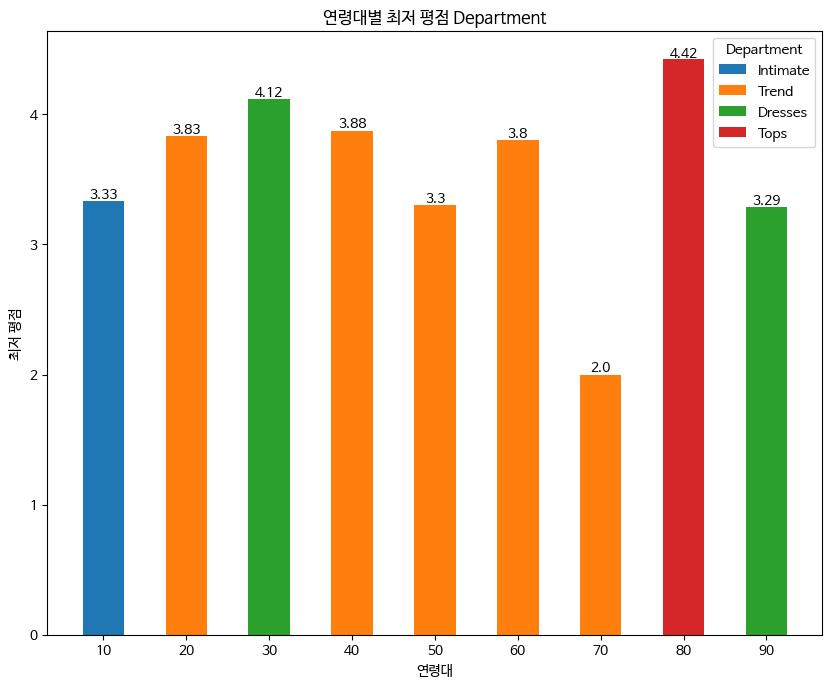

In [ ]:
age_list = age_worst_dep['AGEBAND'].unique()
dep_list = age_worst_dep['DEPARTMENT NAME'].unique()
plt.figure(figsize=(10,8))

for dep in dep_list:
  plt.bar(age_worst_dep[age_worst_dep['DEPARTMENT NAME']==dep]['AGEBAND'], age_worst_dep[age_worst_dep['DEPARTMENT NAME']==dep]['AVG_RATING'], label=dep,
          width=5)
  
for idx, val in age_worst_dep['AVG_RATING'].items():
  val = np.round(val,2)
  plt.annotate(val, (idx*10+10,val), xytext=(0,2), textcoords='offset points',
               ha='center', fontsize=10, color='black')
plt.legend(title='Department')
plt.xticks(range(10,100,10))
plt.xlabel('연령대')
plt.ylabel('최저 평점')
plt.title('연령대별 최저 평점 Department')
plt.savefig('age_dep_bad.png')
plt.show()

리뷰 분석을 통해 size에 대한 리뷰 내용이 많음을 확인 -> size에 대한 정확한 실측이 필요함

연령대별 가장 낮은 Deparment를 확인 해당 연령대별로 할인쿠폰 등 구매 촉진 이벤트 시행